# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 4. Анализ вакансий.


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb` и полученные данные** (подробности далее). Если вы строите интерактивные графики, их стоит прислать в формате html.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Будьте внимательны при работе со сбором данных. Ответственность за корректность ваших действий лежит на вас. Не нагружайте сервера, *делайте паузы между запросами*. Как следствие, начинайте выполнять задание заранее. **Если вас где-то забаннили и т.п., то это не является уважительной причиной продления дедлайна.**
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*

**Перед выполнением задания посмотрите презентацию по выполнению и оформлению домашних заданий с занятия 2.**

---

**Баллы за задание:**

<b><a href="#Легкая-часть" style="text-decoration: none;"><font color="blue">Легкая часть</font></a></b> (достаточно на "хор"):
* Задача 1 &mdash; 60 баллов

<b><a href="#Сложная-часть" style="text-decoration: none;"><font color="orange">Сложная часть</font></a></b> (необходимо на "отл"):
* Задача 2 &mdash; 60 баллов

In [14]:
# Bot check

# HW_ID: fpmi_ad4
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [203]:
import requests
from time import sleep
import json

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')


Второй курс &mdash; самое время задуматься о будущей профессии и проанализировать существующие предложения. Дело тут даже не в том, чтобы найти интересную стажировку. В первую очередь сейчас стоит подумать о том, в какую сторону развиваться дальше. Например, если вы хотите работать в какой-либо конкретной профессии, то наверняка стоит развивать какие-то определенные навыки, и даже выбрать подходящую кафедру. Анализ существующих вакансий поможет определить, какие навыки вам нужны. 

Задание предполагает вариативность исследуемых данных. Вы можете выбрать один из следующих вариантов.
1. Стандартный вариант &mdash; проанализировать вакансии на сайте <a target="_blank" href="https://hh.ru/">hh.ru</a> с использованием <a target="_blank" href="https://dev.hh.ru/">официального API</a>. Далее приведен пример работы с этим API. *Если вы не достаточно уверены в своих силах, рекомендуется выбрать этот вариант.*
2. Разобраться с API других сервисов по поиску вакансий, например, <a target="_blank" href="https://career.habr.com/">Хабр.Карьера</a> или <a target="_blank" href="https://www.superjob.ru/">SuperJob</a>.
3. Извлечение данных с помощью <a target="_blank" href="https://miptstats.github.io/courses/ad_fivt/data_parsing.html#2.-Парсинг-HTML-напрямую">парсинга HTML напрямую</a> некоторых сайтов. Например, вы можете попробовать напрямую распарсить пул вакансий из тех источников, которые не предоставляют API. **Внимание! Обращайте внимание на пользовательские соглашения и на <a target="_blank" href="https://miptstats.github.io/courses/ad_fivt/data_parsing.html#Сбор-данных-из-открытых-источников">эти рекомендации</a>.**
4. Комбинирование нескольких подходов. В этом случае нужно понимать, как находить одинаковые вакансии из разных источников для избежания их двойного учета.
5. Можно также *дополнительно* брать архивные данные из недавнего прошлого, например, из <a target="_blank" href="https://boosters.pro/championship/HeadHunter/overview/description">этого соревнования</a>.

Перед выполнением задания ознакомьтесь с <a target="_blank" href="https://miptstats.github.io/courses/ad_fivt/data_parsing.html">материалом</a> о сборе данных из открытых источников.

Для получения максимального балла за задание достаточно выполнить все задание по стандартному варианту. Альтернативные варианты, даже более сложные, не дают больше баллов, чем максимальное количество баллов по стандартному варианту.

Работа в некоторой степени творческая, поэтому конкретные детали решения в основном остаются на усмотрение автора решения. Например, если в вакансии зарплата укзана "*от ...*" или  "*до ...*", то вы сами решаете, как это обрабатывать, но не забывайте про четкую аргументацию. Не забывайте также заглядывать в презентацию по выполнению и оформлению домашних заданий с занятия 2.

 ---
### Справка по работе с API сервиса hh.ru.   

<b><font color="red">Внимание!</font> При работе с API не забывайте делать паузы между запросами, чтобы не задудосить сервер. Если вас заблокируют, это не будет являться уважительной причиной переноса дедлайна.</b>

Мы будем работать только с вакансиями. Для этого не требуется регистрироваться и получать токен. Ниже приведен краткий пример работы с API. Подробное описание работы с вакансиями, включая параметры запросов и формат ответа можно почитать в <a target="_blank" href="https://github.com/hhru/api/blob/master/docs/vacancies.md#search">документации</a>.

Например, мы хотим найти вакансии по запросу `Data Scientist` в Москве. Тогда первую страницу поиска из 10 вакансий на страницу мы можем получить с запроса к API:

In [16]:
URL = 'https://api.hh.ru/vacancies'

params = {
    'text': "Data Scientist",
    'area': 1,
    'page': 0,
    'per_page': 10
}

req = requests.get(URL, params)
data = json.loads(req.content.decode())

Если все прошло успешно, полученный словарь будет иметь следующие ключи

In [17]:
data.keys()

dict_keys(['items', 'found', 'pages', 'per_page', 'page', 'clusters', 'arguments', 'alternate_url'])

Можем посмотреть на краткое описание первой вакансии

In [18]:
data['items'][0]

{'id': '74376536',
 'premium': False,
 'name': 'Data scientist',
 'department': None,
 'has_test': False,
 'response_letter_required': False,
 'area': {'id': '1', 'name': 'Москва', 'url': 'https://api.hh.ru/areas/1'},
 'salary': {'from': 200000, 'to': 240000, 'currency': 'RUR', 'gross': False},
 'type': {'id': 'open', 'name': 'Открытая'},
 'address': {'city': 'Москва',
  'street': 'Походный проезд',
  'building': '14',
  'lat': 55.838091,
  'lng': 37.417167,
  'description': None,
  'raw': 'Москва, Походный проезд, 14',
  'metro': None,
  'metro_stations': [],
  'id': '953346'},
 'response_url': None,
 'sort_point_distance': None,
 'published_at': '2023-03-01T13:01:29+0300',
 'created_at': '2023-03-01T13:01:29+0300',
 'archived': False,
 'apply_alternate_url': 'https://hh.ru/applicant/vacancy_response?vacancyId=74376536',
 'insider_interview': None,
 'url': 'https://api.hh.ru/vacancies/74376536?host=hh.ru',
 'adv_response_url': None,
 'alternate_url': 'https://hh.ru/vacancy/74376536',


Сколько всего найдено вакансий

In [19]:
data['found']

258

Количество страниц в результатах поиска

In [20]:
data['pages']

26

Из результатов можем сделать удобную таблицу, причем в дальнейшем можно оставить только те колонки, которые необходимы для анализа.

In [21]:
df = pd.json_normalize(data['items'])
df.head()

,id,premium,name,department,has_test,response_letter_required,response_url,sort_point_distance,published_at,created_at,...,address.metro.station_name,address.metro.line_name,address.metro.station_id,address.metro.line_id,address.metro.lat,address.metro.lng,salary,department.id,department.name,employer.logo_urls
0,74376536,False,Data scientist,NaN,False,False,None,None,2023-03-01T13:01:29+0300,2023-03-01T13:01:29+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,77613664,False,Data Scientist,NaN,False,False,None,None,2023-03-02T17:13:07+0300,2023-03-02T17:13:07+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,74257661,False,Data scientist,NaN,False,False,None,None,2023-03-01T15:02:29+0300,2023-03-01T15:02:29+0300,...,Минская,Солнцевская,133.555,133,55.723200,37.503800,NaN,NaN,NaN,NaN
3,77604691,False,Junior Data Scientist (отдел исследований и мо...,NaN,False,False,None,None,2023-03-02T14:52:44+0300,2023-03-02T14:52:44+0300,...,Белорусская,Замоскворецкая,2.19,2,55.777439,37.582107,NaN,NaN,NaN,NaN
4,77656158,False,Data Scientist Intern,NaN,False,False,None,None,2023-03-03T16:06:49+0300,2023-03-03T16:06:49+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Для получения полного описания вакансии потребуется задать отдельный запрос, используя ее `id`.

In [22]:
vacancy = df['id'].iloc[0]
vacancy_url = f'https://api.hh.ru/vacancies/{vacancy}'

req = requests.get(vacancy_url)
vacancy_info = json.loads(req.content.decode())

In [23]:
vacancy_info

{'id': '74376536',
 'premium': False,
 'billing_type': {'id': 'standard_plus', 'name': 'Стандарт плюс'},
 'relations': [],
 'name': 'Data scientist',
 'insider_interview': None,
 'response_letter_required': False,
 'area': {'id': '1', 'name': 'Москва', 'url': 'https://api.hh.ru/areas/1'},
 'salary': {'from': 200000, 'to': 240000, 'currency': 'RUR', 'gross': False},
 'type': {'id': 'open', 'name': 'Открытая'},
 'address': {'city': 'Москва',
  'street': 'Походный проезд',
  'building': '14',
  'lat': 55.838091,
  'lng': 37.417167,
  'description': None,
  'raw': 'Москва, Походный проезд, 14',
  'metro': None,
  'metro_stations': []},
 'allow_messages': True,
 'experience': {'id': 'between3And6', 'name': 'От 3 до 6 лет'},
 'schedule': {'id': 'remote', 'name': 'Удаленная работа'},
 'employment': {'id': 'full', 'name': 'Полная занятость'},
 'department': None,
 'contacts': None,
 'description': '<strong>Обязанности:</strong> <ul> <li>Работа в команде по созданию модуля Data Science &amp; AI

### <font color="blue"><i>Легкая часть</i></font>

 ---
### Задача 1.   

Исследуем профессию Data Scientist. Найдите как можно больше вакансий по этой профессии в Москве. Учтите, что имеет смысл искать также по другим ключевым словам, например, `аналитик данных`.

In [42]:
params = {
    'text': "\"Data Scientist\" OR \"Аналитик Данных\" \
             OR \"Data Engineer\" OR \"Инженер Данных\" \
             OR  \"ML разработчик\" OR \"ML engineer\"",
    'area': 1,
    'page': 0,
    'per_page': 100
}

req = requests.get(URL, params)
data = json.loads(req.content.decode())
print("Найдено: ", data['found'])
df_overall = pd.json_normalize(data['items'])

Найдено:  1152


In [43]:
for i in range (1, data['pages']):
    sleep(0.1)
    params['page'] = i
    req = requests.get(URL, params)
    data = json.loads(req.content.decode())
    df_overall = pd.concat([df_overall, pd.json_normalize(data['items'])])
df_overall.head(5)

,id,premium,name,has_test,response_letter_required,salary,address,response_url,sort_point_distance,published_at,...,address.id,address.metro.station_name,address.metro.line_name,address.metro.station_id,address.metro.line_id,address.metro.lat,address.metro.lng,employer.logo_urls,insider_interview.id,insider_interview.url
0,76536709,False,Data Scientist (LTV),False,False,NaN,NaN,None,None,2023-03-04T11:32:26+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,77113559,False,Data Engineer,False,False,NaN,NaN,None,None,2023-03-04T09:22:31+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,76945904,False,Data Engineer,True,False,NaN,NaN,None,None,2023-03-04T06:36:13+0300,...,55799,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,77120466,False,Data Engineer (Backend),False,False,NaN,NaN,None,None,2023-03-04T10:56:44+0300,...,6867540,Деловой центр,МЦК,95.537,95,55.747222,37.532222,NaN,NaN,NaN
4,77656659,False,Data Scientist,False,False,NaN,NaN,None,None,2023-03-03T16:15:22+0300,...,604548,Бульвар Дмитрия Донского,Серпуховско-Тимирязевская,9.170,9,55.568201,37.576856,NaN,NaN,NaN


В полученную выборку некоторые вакансии могли попасть несколько раз. Удалите дубликаты.

In [47]:
df_overall = df_overall.drop_duplicates(subset=['id'])
print('Без дубликатов: ', len(df_overall))

Без дубликатов:  1152


Загрузите подробное описание каждой вакансии и создайте удобную для дальнейших действий таблицу данных.

In [48]:
df = pd.DataFrame()

for id in df_overall['id']:
    sleep(0.1)
    req = requests.get(f'https://api.hh.ru/vacancies/{id}')
    vacancy_info = json.loads(req.content.decode())
    vacancy_row = pd.json_normalize(vacancy_info)
    df = pd.concat([df, vacancy_row])

In [61]:
df= df.reset_index(drop=True)

**Полученную таблицу необходимо сохранить в формате xlsx и отправить боту вместе с решением.**

In [78]:
print(df[['id', 'name']].head(5))
df.to_excel("data_scientists.xlsx")

         id                     name
0  76536709     Data Scientist (LTV)
1  77113559            Data Engineer
2  76945904            Data Engineer
3  77120466  Data Engineer (Backend)
4  77656659           Data Scientist


**Вопрос 1.** Сколько сейчас доступно вакансий по вашему запросу?

In [79]:
len(df)

1152

**Вопрос 2.** Какие навыки чаще всего встречаются в вакансиях по данной специальности?

Для этого найдите соответствующее поле в данных из полного описания вакансий, проанализируйте его и составьте список навыков и количество упоминаний каждого. Визуализируйте полученную информацию по топ-15 навыков.

Поработаем над форматом колонки (приведение к простому списку было выполнено в этой же ячейке до этого)

In [131]:
df['key_skills'] = df['key_skills'].apply(lambda skills: [skill.title() for skill in skills])

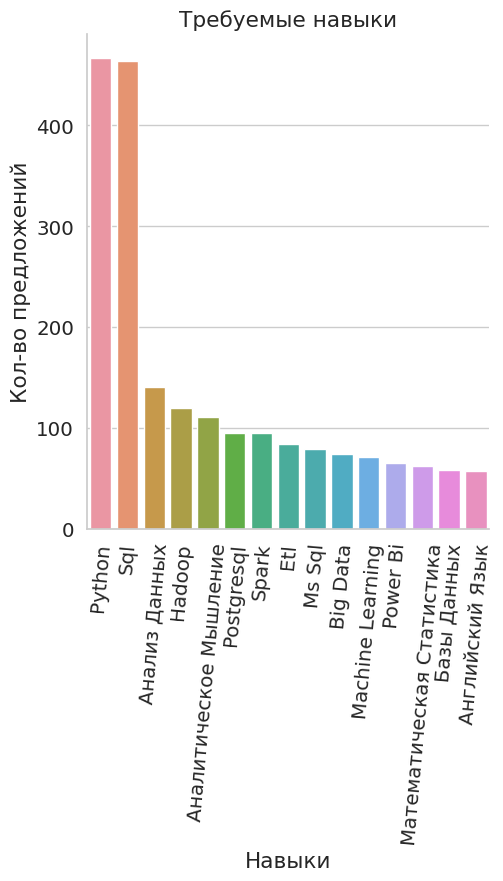

In [141]:
skills = df[['id', 'key_skills']].explode('key_skills').groupby('key_skills').count()\
.rename(columns={'id': 'count'}).sort_values('count', ascending=False).reset_index()

sns.catplot(data=skills.head(15), x='key_skills', y='count', kind='bar', height=6)
plt.title('Требуемые навыки')
plt.xticks(rotation=85)
plt.xlabel('Навыки')
plt.ylabel('Кол-во предложений')
plt.show()

**Вопрос 3.** Какую зарплату готовы платить работодатели? Соберите некоторым образом статистику и постройте гистограмму.

При работе с данными о заработной плате обратите внимание на валюту и <a target="_blank" href="https://yandex.ru/search/?text=gross%2Fnet&clid=1955455&win=446&lr=213&noreask=1">gross/net</a>. Постоянно подгружать курс валюты не требуется, достаточно фиксировать какой-то один более менее актуальный.

In [158]:
print(pd.unique(df['salary.currency']))

bank = {'EUR': 80.05, 'USD': 75.46}

def sallary_chooser(row):
    k = 1
    if not pd.isna(row['salary.currency']) and not row['salary.currency'] == 'RUR':
        k = bank[row['salary.currency']]
    if row['salary.gross']:
        k *= 0.87

    if not pd.isna(row['salary']):
        return row['salary'] * k
    if not pd.isna(row['salary.from']) and not pd.isna(row['salary.to']): 
        return (row['salary.from'] + row['salary.to']) / 2 * k
    if not pd.isna(row['salary.from']):
        return row['salary.from'] * k
    if not pd.isna(row['salary.to']):
        return row['salary.to'] * k

[nan 'RUR' 'EUR' 'USD']


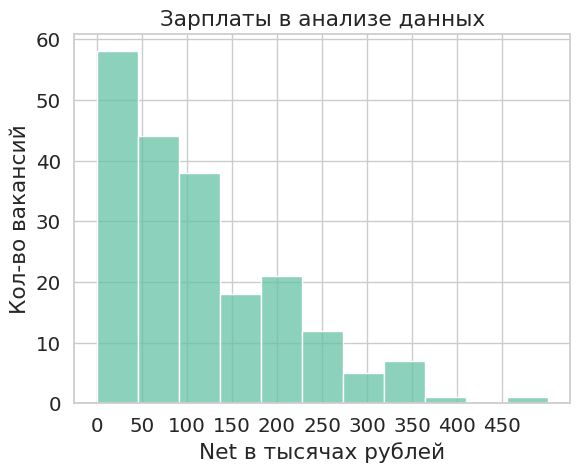

In [207]:
df['salary'] = df.apply(sallary_chooser, axis = 1)

sns.histplot(df[(df.salary > 0) & (df.salary <= 5e5)]['salary'].dropna(), bins = 11)
plt.xticks(np.arange(0, 5e5, step=5e4), [ str(50*i) for i in range(0, 10)])
plt.ylabel('Кол-во вакансий')
plt.xlabel('Net в тысячах рублей')
plt.title('Зарплаты в анализе данных')
plt.show()

Проведите аналогичный анализ для наиболее привлекательной для вас профессии в любом регионе. Если это Data Scientist, то для анализа выберите другую. В данном пункте спокойно можно сделать копипасту кода.

In [210]:
params = {
    'text': "\"С++ разработчик\" OR \"Backend C++\" \
             OR \"C++ developer\" OR \"C++ engineer\" \
             OR  \"Software engineer C++\" OR \"C++\"",
    'area': 1,
    'page': 0,
    'per_page': 100
}

req = requests.get(URL, params)
data = json.loads(req.content.decode())
print("Найдено: ", data['found'])
df_overall = pd.json_normalize(data['items'])

Найдено:  1549


In [211]:
for i in range (1, data['pages']):
    sleep(0.1)
    params['page'] = i
    req = requests.get(URL, params)
    data = json.loads(req.content.decode())
    df_overall = pd.concat([df_overall, pd.json_normalize(data['items'])])
df_overall.head(5)

,id,premium,name,department,has_test,response_letter_required,response_url,sort_point_distance,published_at,created_at,...,schedule.id,schedule.name,salary,address,insider_interview.id,insider_interview.url,address.metro,department.id,department.name,employer.logo_urls
0,76139943,False,Middle C++ разработчик,NaN,False,False,None,None,2023-03-04T12:47:08+0300,2023-03-04T12:47:08+0300,...,remote,Удаленная работа,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,76458560,False,Middle/Senior C++ Developer,NaN,False,False,None,None,2023-03-04T13:21:11+0300,2023-03-04T13:21:11+0300,...,fullDay,Полный день,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,76725975,False,C++ разработчик,NaN,False,False,None,None,2023-03-03T15:53:24+0300,2023-03-03T15:53:24+0300,...,fullDay,Полный день,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,77640048,False,C++ разработчик,NaN,False,False,None,None,2023-03-03T11:38:27+0300,2023-03-03T11:38:27+0300,...,remote,Удаленная работа,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,77213849,False,С++ разработчик,NaN,False,False,None,None,2023-03-03T09:35:10+0300,2023-03-03T09:35:10+0300,...,fullDay,Полный день,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [212]:
df_overall = df_overall.drop_duplicates(subset=['id'])
print('Без дубликатов: ', len(df_overall))

Без дубликатов:  1549


In [213]:
df = pd.DataFrame()

for id in df_overall['id']:
    sleep(0.1)
    req = requests.get(f'https://api.hh.ru/vacancies/{id}')
    vacancy_info = json.loads(req.content.decode())
    vacancy_row = pd.json_normalize(vacancy_info)
    df = pd.concat([df, vacancy_row])

In [218]:
df= df.reset_index(drop=True)
print(df[['id', 'name']].head(5))
df.to_excel("c++.xlsx")
print('Кол-во вакансий: ', len(df))

         id                         name
0  76139943       Middle C++ разработчик
1  76458560  Middle/Senior C++ Developer
2  76725975              C++ разработчик
3  77640048              C++ разработчик
4  77213849              С++ разработчик
Кол-во вакансий:  1549


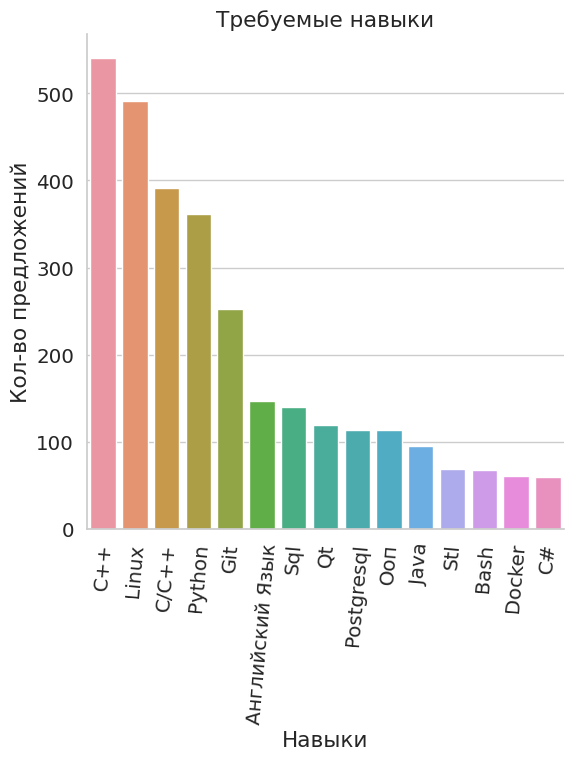

In [219]:
df['key_skills'] = df['key_skills'].apply(lambda skills: [skill['name'].title() for skill in skills])
skills = df[['id', 'key_skills']].explode('key_skills').groupby('key_skills').count()\
.rename(columns={'id': 'count'}).sort_values('count', ascending=False).reset_index()

sns.catplot(data=skills.head(15), x='key_skills', y='count', kind='bar', height=6)
plt.title('Требуемые навыки')
plt.xticks(rotation=85)
plt.xlabel('Навыки')
plt.ylabel('Кол-во предложений')
plt.show()

In [220]:
print(pd.unique(df['salary.currency']))

bank = {'EUR': 80.05, 'USD': 75.46}

def sallary_chooser(row):
    k = 1
    if not pd.isna(row['salary.currency']) and not row['salary.currency'] == 'RUR':
        k = bank[row['salary.currency']]
    if row['salary.gross']:
        k *= 0.87

    if not pd.isna(row['salary']):
        return row['salary'] * k
    if not pd.isna(row['salary.from']) and not pd.isna(row['salary.to']): 
        return (row['salary.from'] + row['salary.to']) / 2 * k
    if not pd.isna(row['salary.from']):
        return row['salary.from'] * k
    if not pd.isna(row['salary.to']):
        return row['salary.to'] * k

['RUR' nan 'USD' 'EUR']


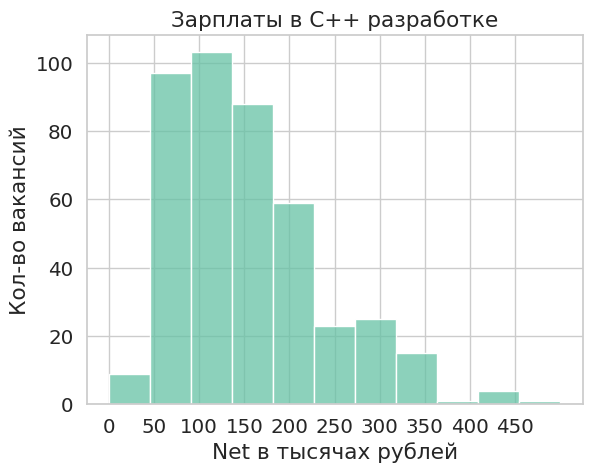

In [222]:
df['salary'] = df.apply(sallary_chooser, axis = 1)

sns.histplot(df[(df.salary > 0) & (df.salary <= 5e5)]['salary'].dropna(), bins = 11)
plt.xticks(np.arange(0, 5e5, step=5e4), [ str(50*i) for i in range(0, 10)])
plt.ylabel('Кол-во вакансий')
plt.xlabel('Net в тысячах рублей')
plt.title('Зарплаты в С++ разработке')
plt.show()

Не забывайте про выводы.

Направления кажутся довольно похожими, в том плане что и там и там видны четкие лидеры среди требований к соискателям. Для анализа данных - Sql, Python; C++ разработчик - C++, Linux, Git, Python. Как можно заметить для C++ разработчика указываемых в обьявлениях требований больше и по кол-ву и по суммарному обьему требуемых знаний. Этим, как я думаю, вызвано небольшое смещение зарплат в большую сторону для разработчика, по сравнению с аналитиком данных. Вакансии являются схожими по популярности/актуальности, что видно из общего кол-ва вакансий для соответствующего запроса. Максимальная предложенная зарплата одинакова для рассматриваемых сфер.


---
### <font color="orange"><i>Сложная часть</i></font>

### Задача 2.   

Для *одной* из рассмотренных ранее профессий ответьте на следующие вопросы:  
- Какой опыт требуется для данной вакансии?
- Какие работодатели в топе? 
- В каком районе Москвы данная вакансия пользуется наибольшим и наименьшим спросом?

Не забудьте про визуализацию, в частности, постройте распределений вакансий на карте.

*Напоминание.* Работа в некоторой степени творческая, поэтому конкретные детали решения в основном остаются на усмотрение автора решения.


Посмотрим на требуемый опыт для C++ разработчика.Для начала поработаем над данными

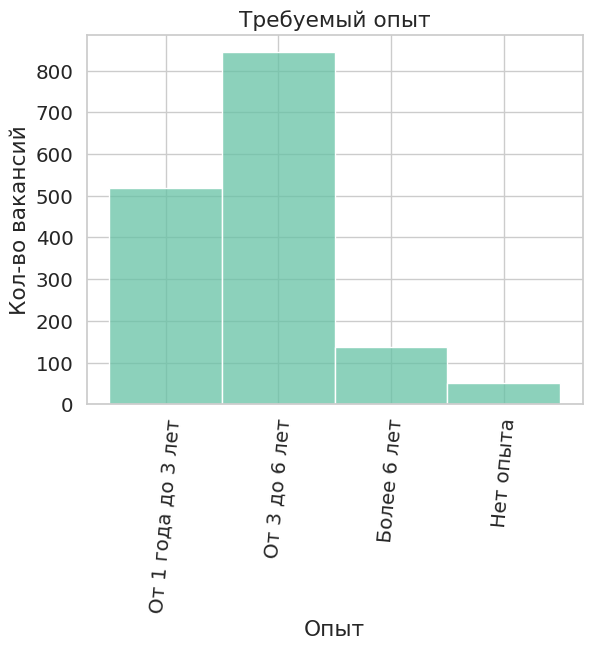

In [231]:
sns.histplot(data=df, x='experience.name')
plt.xticks(rotation=85)
plt.ylabel('Кол-во вакансий')
plt.xlabel('Опыт')
plt.title('Требуемый опыт')
plt.show()

Анализ работадателей

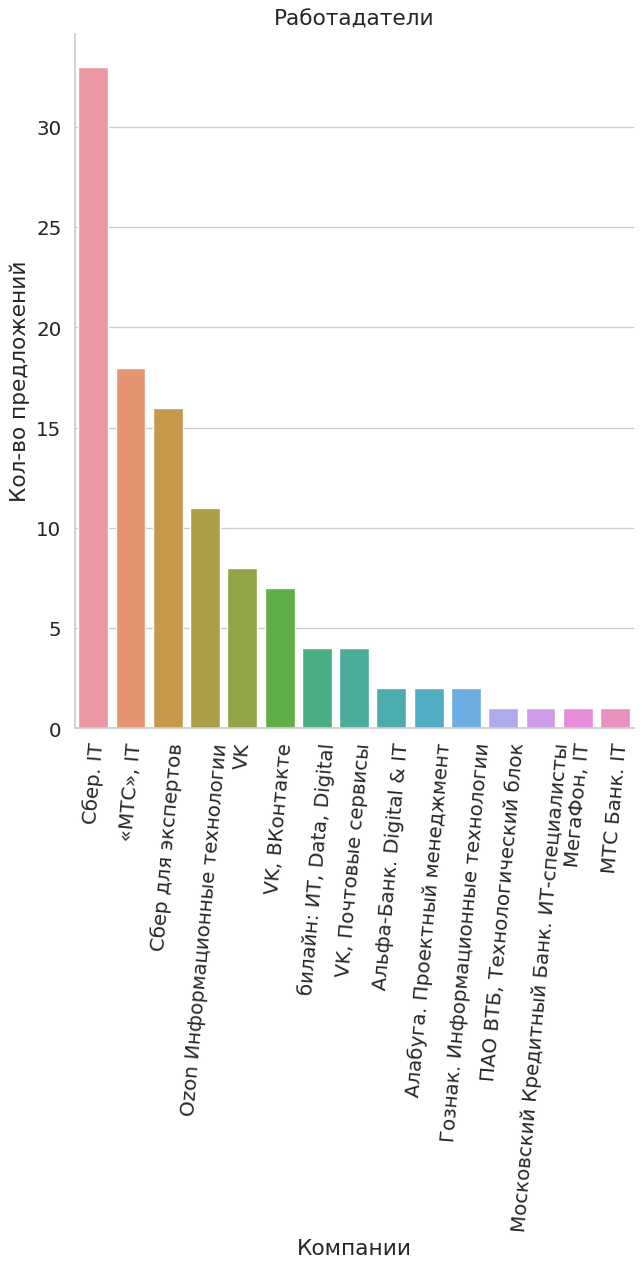

In [237]:
comp = df[['id', 'department.name']].groupby('department.name').count()\
.rename(columns={'id': 'count'}).sort_values('count', ascending=False).reset_index()

sns.catplot(data=comp.head(15), x='department.name', y='count', kind='bar', height=8)
plt.title('Работадатели')
plt.xticks(rotation=85)
plt.xlabel('Компании')
plt.ylabel('Кол-во предложений')
plt.show()

География предложений

In [255]:
import plotly
import plotly.graph_objects as go
import plotly.express as px

fig = px.scatter_mapbox(
    df,
    title='Вакансии',
    lat='address.lat', lon='address.lng',
    height=600, zoom=10,
    mapbox_style='open-street-map',
    labels='companies',
    center = {'lat': 55.751667, 'lon': 37.617778}
)
fig.update_layout(margin={"r": 0,"t":0,"l":0,"b":0}, showlegend=True)
fig.write_html("a.html")
fig.show()

Какие выводы можно сделать из построенных графиков?

Как и ожидалось: чем меньше опыт - тем труднее найти работу (меньше предложений). В основном на рынке ищу опытных (>3 лет работы) разработчиков. Среди работадателей сильно выделяются Сбер, Мтс, Вк. Остальные "большие" по числу вакансий работадатели - также крупные ИТ компании. Офисы (предполагаемые места работы) равномерно распределены по центру Москвы, большое скопление наблюдается в Москва-Сити.